-0423 새로 받은 lidar(L515) image 한번 분석해보기    
-image processing은 deep한 분야라 일단, 있는 알고리즘 쓰고 나중에 새로운 아이디어 내서 해보기(박박사님)
clahe알고리즘 (히스토그램 평활화)사용해보는것도 좋을 듯

# [ Realsense 이용한 image 전처리]
1. rgb, depth 이미지 각각을 확인하고, 각각 이미지 따로 처리(2021.03.31)
2. depth 정보를 이용하여 background 없애기 --> average filter가 gaussian 보다 좋음 & ㅇ


  



In [2]:
# Python 3.8 & OpenCV 4.5.1.48
# Lastupdate 2021.4.13 jieun

import numpy as np
import cv2 as cv

#image size가 아래와 같음. 이 값을 사용하지는 않음
width = 1280
height = 720

##  RGB, depth 이미지 각각을 확인하고, 각각 이미지 따로 처리(2021.03.31)

### image load

In [4]:
#rgb image, depth image, depth csv load

dir_name = "Lidar_20210423/Img_20210416_016"
depth = np.loadtxt(dir_name + "/Dist_data_1.csv", delimiter=',')
color = cv.imread(dir_name + "/RGB_1.jpg", cv.IMREAD_COLOR)
colorized_depth = cv.imread( dir_name + "/Dist_img_1.png", cv.IMREAD_COLOR)

## HSV for flower detection -- 꽃이 눈에 확 띈다
color_hsv = cv.cvtColor(color, cv.COLOR_BGR2HSV) 

In [7]:
## 특정 이미지 hsv확인
# #rgb image, depth image, depth csv load

# dir_name = "/home/vision/Documents/Farmbot/LiDAR_20210506/data3_ALLselect/Img_20210422_116"
# color = cv.imread(dir_name + "/KIST_Tomato_Z200_RGB_2021-04-22(112621)_3.png", cv.IMREAD_COLOR)


# ## HSV for flower detection -- 꽃이 눈에 확 띈다
# color_hsv = cv.cvtColor(color, cv.COLOR_BGR2HSV) 
# cv.imshow('hsv',color_hsv)
# cv.imshow('color',color)
# cv.waitKey(0) # space 바 처럼 키 아무거나 누르면 끝남 (창도 닫힘)
# cv.destroyAllWindows() 

### image 띄우기

In [115]:
#image 띄우기
print("RGB shape: ",color.shape)
print("colorized_depth shape: ",colorized_depth.shape)
print("Depth shape: ",depth.shape)
print("color_hsv shape: ",color_hsv.shape)

cv.imshow('RGB', color)
cv.imshow('Colorized depth', colorized_depth)
cv.imshow('Depth', depth)
cv.imshow('HSV', color_hsv)
 
cv.waitKey(0) # space 바 처럼 키 아무거나 누르면 끝남 (창도 닫힘)
cv.destroyAllWindows() 

RGB shape:  (720, 1280, 3)
colorized_depth shape:  (720, 1280, 3)
Depth shape:  (720, 1280)
color_hsv shape:  (720, 1280, 3)


In [70]:
#RGB 이미지와 hsv이미지 합침 just plus & weighted sum

rgbplus = cv.add(color,color_hsv)
rgbplusw = cv.addWeighted(color,0.5, color_hsv,0.5,0.0)

cv.imshow('RGB+HSV',rgbplus)
cv.imshow('RGB/2+ HSB/2',rgbplusw)

cv.waitKey(0)
cv.destroyAllWindows()   

In [16]:
# # 이미지 경계값(테두리) --별로임

# # 이미지 로드
# image_gray = cv.imread(dir_name + "/RGB_1.jpg", cv.IMREAD_GRAYSCALE)

# # 픽셀 강도의 중간값을 계산
# median_intensity = np.median(image_gray)

# # 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
# lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
# upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# # Canny edge detection 적용
# image_canny = cv.Canny(image_gray, lower_threshold, upper_threshold)

# cv.imshow('d',image_canny)
# cv.waitKey(0)
# cv.destroyAllWindows() 

## depth 정보를 이용하여 background 제거(2021.04.13)

In [5]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

### depth.csv파일 정보 확인 - 값, 분포

In [6]:
# # 이방법 말고 아래 방법으로 1. csv-> dataframe만들기

# #csv파일을 data frame파일로 만들기
# depth_pd=pd.read_csv("Img_20200713_066a/Dist_data_1.csv", delimiter=',') # '+'로 표시하는 거 안됨
# depth_pd

In [7]:
# 1. np로 받은 값으로 depth csv->dataframe 만들기
dir_name = "Img_20200713_066a"
depth = np.loadtxt(dir_name + "/Dist_data_1.csv", delimiter=',')
depth_df=pd.DataFrame(depth)

depth_df

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.000,0.000,0.000,0.000,5.166,5.166,5.114,5.114,5.114,5.114,...,46.023003,56.250004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004
1,0.000,0.000,0.000,0.000,5.166,5.166,5.114,5.114,5.114,5.114,...,46.023003,56.250004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004
2,0.000,0.000,0.000,0.000,0.000,5.166,5.140,5.140,5.140,5.140,...,40.500004,50.625004,63.281002,63.281002,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004
3,0.000,0.000,0.000,0.000,0.000,5.219,5.219,5.219,5.192,5.192,...,37.500000,44.022003,56.250004,56.250004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004
4,0.000,0.000,0.000,0.000,0.000,5.219,5.219,5.219,5.192,5.192,...,37.500000,44.022003,56.250004,56.250004,65.535004,65.535004,65.535004,65.535004,65.535004,65.535004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.513,0.514,0.515,0.515,0.516,0.516,0.516,0.517,0.518,0.518,...,0.000000,0.606000,0.606000,0.606000,0.606000,0.606000,0.607000,0.607000,0.000000,0.000000
716,0.514,0.514,0.515,0.515,0.516,0.516,0.516,0.517,0.518,0.518,...,0.000000,0.000000,0.606000,0.606000,0.606000,0.606000,0.606000,0.606000,0.000000,0.000000
717,0.514,0.515,0.516,0.516,0.516,0.516,0.516,0.517,0.517,0.518,...,0.000000,0.606000,0.605000,0.605000,0.605000,0.604000,0.604000,0.604000,0.000000,0.000000
718,0.514,0.515,0.516,0.516,0.516,0.517,0.517,0.517,0.517,0.517,...,0.000000,0.606000,0.605000,0.605000,0.605000,0.604000,0.604000,0.604000,0.000000,0.000000


depth의 max : 59.559002
depth의 min : 0.0

 [845582      0      0      0      0      0      0      0      0      0
   4265   3399   4061   4010   4405   3443   3833   3025   2831   2635
   1763   1918   1970   1897   1910   1939    920    986   2153   1106
   1043   1127   1174   1224   1337      0   1351   1431   1597      0
   1576      0   1401      0   1487      0   1360      0   1366      0
   1318      0      0   1549      0      0   1584      0      0   1624
      0      0      0      0      0]


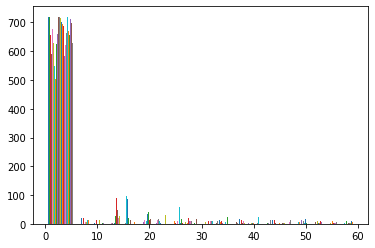

In [26]:
# # 2. depth값 range확인, 히스토그램 그려보기
# # 0이 검은색으로 표현됨. 숫자가 클수록 가깝고 밝은색으로 표현됨
# print("depth의 max :", depth.max() )
# print("depth의 min :", depth.min() )

# #값들 분포
# bins=np.arange(0,66,1) # (start, stop, step)
# hist, bins = np.histogram(depth, bins)
# print("\n",hist)
# #히스토그램 그리기 -> 10이하 값 엄청 많음. 60이상도 조금 있음
# plt.hist(depth)
# plt.show()

In [20]:
# # 0이 검은색으로 표현됨을 확인 (사용안함 그냥 확인용임)

# cv.imshow('s',np.zeros((100,100)))
# cv.waitKey(0) # space 바 처럼 키 아무거나 누르면 끝남 (창도 닫힘)
# cv.destroyAllWindows() 

### Filter 만들기 - 0&1로, average blur, gaussian blur

In [58]:
# 10보다 작고, 60보다 큰 값은 제거하고 그 사이값만 사용하기
dir_name = "Img_20200713_066a"
depth = np.loadtxt(dir_name + "/Dist_data_1.csv", delimiter=',')
#1. depth에서 10보다 작고 60보다 큰곳은 bgfilter에서 0으로 만들기 (그 이외는 1)
bgfilter = np.ones((depth.shape))
bgfilter[depth==0]=0
bgfilter[depth>1]=0

#2. filter를 blurring하기 -average blurring
kernel = np.ones((40,40),np.float32)/(40*40)
bla_bgfilter=cv.filter2D(bgfilter,-1,kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성


#3. 가우시안 blurring하기 
blg_bgfilter=cv.GaussianBlur(bgfilter,(25,25),0) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성

#filter size 출력
print("shape_bgfilter: ",bgfilter.shape)
print("shape_bla_bgfilter: ",bla_bgfilter.shape)
print("shape_blg_bgfilter: ",blg_bgfilter.shape)
print("type_blg_bgfilter: ",type(blg_bgfilter))

#imshow
cv.imshow('Depth',depth)
cv.imshow('Filter',bgfilter)
cv.imshow('Filter_blurred_avg',bla_bgfilter)
cv.imshow('Filter_blurred_gaus',blg_bgfilter)
cv.waitKey(0)  
cv.destroyAllWindows() 


shape_bgfilter:  (720, 1280)
shape_bla_bgfilter:  (720, 1280)
shape_blg_bgfilter:  (720, 1280)
type_blg_bgfilter:  <class 'numpy.ndarray'>


In [ ]:
# # depth자체를 blur해서 만들어보기------------------------------------------------
# kernel = np.ones((5,5),np.float32)/(5*5)
# br_depth = bl_bgfilter=cv.filter2D(depth,-1,kernel)
# #1. depth에서 10보다 작고 60보다 큰곳은 bgfilter에서 0으로 만들기 (그 이외는 1)
# bgfilter = np.ones((br_depth.shape))
# bgfilter[br_depth==0]=0
# bgfilter[br_depth>1]=0

# #2. filter를 blurring하기 -average blurring
# kernel = np.ones((5,5),np.float32)/(5*5)
# bl_bgfilter=cv.filter2D(bgfilter,-1,kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성

# cv.imshow('Depth',br_depth)
# cv.imshow('Filter',bgfilter)
# cv.imshow('Filter_blurred',bl_bgfilter)
# cv.waitKey(0)  
# cv.destroyAllWindows() 

### [0,1로만 이루어진 filter]bgfilter filter이용해서 background 제거 -test1

In [101]:
test1 = color.copy() # copy하지 않으면 주소값 복사돼서 원본 이미지도 바뀜.
test1[bgfilter==0]=0
cv.imshow('test1',test1)
cv.waitKey(0)
cv.destroyAllWindows()

### [average blur bla_bgfilter] 이용해서 background 제거-test2

rgb image에 filter를 적용하려고 하니 filter는 layer가 1개고, rgb image는 3개라서 잘 안됨. (해결 :X)  
그래서 우선, rgb이미지를 gray scale로 만든 후, 해보겠음.

In [95]:
# rgb image -> gray image
test2=cv.cvtColor(color,cv.COLOR_RGB2GRAY)
print("gray scaled rgb image shape: ", test2.shape)
cv.imshow('gray scaled rgb image', test2)
cv.waitKey(0)
cv.destroyAllWindows()

gray scaled rgb image shape:  (720, 1280)


In [96]:
#결과가 black and white only 로 나옴 --> 1.2.5에서 해결
test2= test2*bla_bgfilter
cv.imshow('test2', test2)
cv.waitKey(0)
cv.destroyAllWindows()

In [103]:
#imwrite로 결과 저장해서 보면 잘 나옴. 
cv.imwrite(dir_name + "/test2.png", test2)

True

### [디버깅] 2번, 3번 filter이용시 black & white로 나오는 이유알아보기 -type이 원인

[type]이 원인임   
imshow가 아니라 imwrite를 해서 보면, black&white가 아니라 제대로 나옴. https://answers.opencv.org/question/34269/imshow-error-but-imwrite-ok-in-python/  
각 point의 type이 uint8가 아닌 float라서,,  
int로 바꿔봄. test2 이미지는 잘 나오지만, 오히려 depth은 이상하게 나옴

If the image is 8-bit unsigned, it is displayed as is.  
If the image is 16-bit unsigned or 32-bit integer, the pixels are divided by 256. That is, the value range [0,255*256] is mapped to [0,255].  
If the image is 32-bit or 64-bit floating-point, the pixel values are multiplied by 255. That is, the value range [0,1] is mapped to [0,255].  
https://docs.opencv.org/4.0.0/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563 (imshow())

In [105]:
print("color type:",type(color[0][0][0]))
print("test2 type:",type(test2[0][0]))
print("depth type:",type(depth[0][0]))

color type: <class 'numpy.uint8'>
test2 type: <class 'numpy.float64'>
depth type: <class 'numpy.float64'>


In [116]:
test22 = test2.astype('uint8')
depth1 = depth.astype('uint8')
print("color type:",type(color[0][0][0]))
print("test1 type:",type(test22[0][0]))
print("depth type:",type(depth1[0][0]))

cv.imshow('test22',test22)
cv.imshow('depth1',depth1)
cv.imshow('depth',depth) #depth1이랑 다르게 나옴
cv.waitKey(0)
cv.destroyAllWindows()
print("\n\ntest2는 int로 바꾸니, imwrite했을 때 처럼 잘 나오고, depth는 그냥 imshow하는 것보다 안나옴.\nimwrite는 차이 없음 ")

color type: <class 'numpy.uint8'>
test1 type: <class 'numpy.uint8'>
depth type: <class 'numpy.uint8'>


test2는 int로 바꾸니, imwrite했을 때 처럼 잘 나오고, depth는 그냥 imshow하는 것보다 안나옴.
imwrite는 차이 없음 


[range]  
array의 요소값 범위 알아보기 (depth가 int로 바꿨을때 잘 안나오는 이유를 알아보자)

In [104]:
#우선 depth와 depth1를 imwrite하면 어떻게 보이는 지 확인해보자 - 둘다 이상함
cv.imwrite(dir_name + "/depth.png", depth)
cv.imwrite(dir_name + "/depth1.png", depth1)

True

In [107]:
#depth과 rgb, test1의 value 범위확인
print("depth min:", depth.min(), ", depth max: ", depth.max())
print("rgb min:", color.min(), ", rgb max: ", color.max())
print("test1 min:", test1.min(), ", test1 max: ", test1.max())

depth min: 0.0 , depth max:  65.535004
rgb min: 11 , rgb max:  255
test1 min: 0 , test1 max:  255


### [Gaussian blur blg_bgfilter] 이용해서 background 제거-test3

In [118]:
# gray image * filter
test3=cv.cvtColor(color,cv.COLOR_RGB2GRAY)
test3=test3*blg_bgfilter
test33 = test3.astype('uint8')
cv.imshow('test3', test33)
cv.waitKey(0)
cv.destroyAllWindows()